In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

C:\Users\Saikat Biswas\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
ath=pd.read_csv("athlete_events.csv")
reg=pd.read_csv("noc_regions.csv")

In [5]:
ath2 = ath.merge(reg, how = "left" , on = "NOC")
ath2.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
ath2.shape

(271116, 17)

In [7]:
ath2.rename(columns={"region":"Region","notes":"Notes"})

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [8]:
ath2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [9]:
ath2.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [10]:
nancol=ath2.isna().any()
nancol

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
region     True
notes      True
dtype: bool

In [11]:
df2=dict(nancol)
df2

{'ID': False,
 'Name': False,
 'Sex': False,
 'Age': True,
 'Height': True,
 'Weight': True,
 'Team': False,
 'NOC': False,
 'Games': False,
 'Year': False,
 'Season': False,
 'City': False,
 'Sport': False,
 'Event': False,
 'Medal': True,
 'region': True,
 'notes': True}

In [12]:
for i in df2:
    if(df2[i]==True):
        print(i)

Age
Height
Weight
Medal
region
notes


In [17]:
ath2[ath2["Team"]=="India"].head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [18]:
ath2[ath2["Team"]=="Japan"].head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


In [33]:
df=[]
for i in range(len(ath2["Team"])):
    df.append(ath2["Team"][i])
    
df


['China',
 'China',
 'Denmark',
 'Denmark/Sweden',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Netherlands',
 'Netherlands',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norwa

In [70]:
top=ath2.Team.value_counts().sort_values(ascending=False).head(10)
top

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

In [71]:
for key, value in top.items():
    print(key)

United States
France
Great Britain
Italy
Germany
Canada
Japan
Sweden
Australia
Hungary


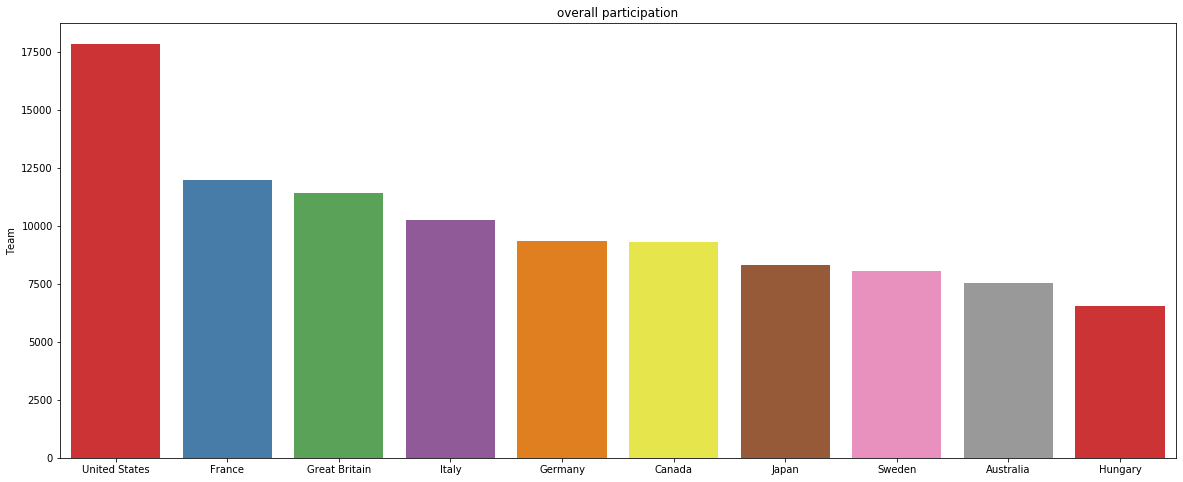

In [96]:
plt.figure(figsize=(20,8))
plt.title('overall participation')
sns.barplot(x=top.index,y=top , palette='Set1');

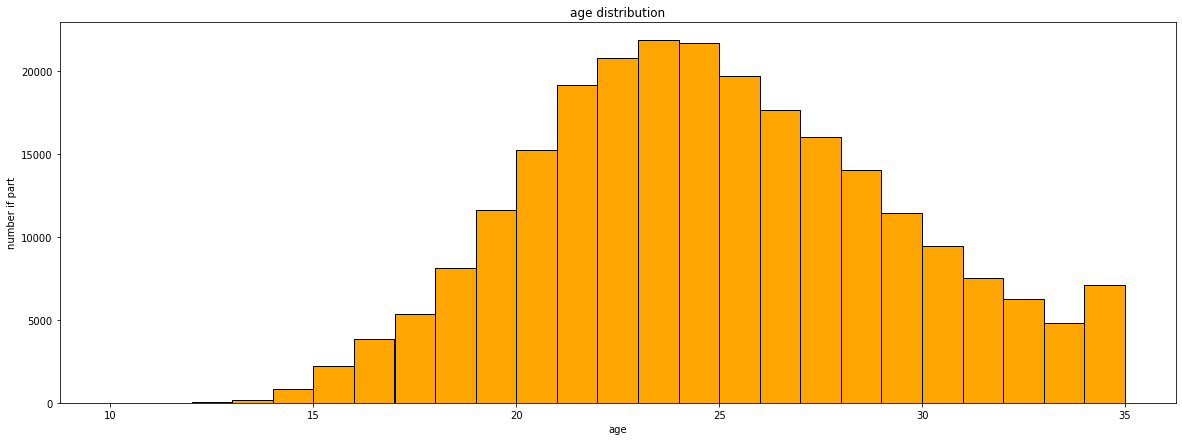

In [101]:
plt.figure(figsize=(20,7))
plt.title('age distribution')
plt.xlabel("age")
plt.ylabel("number if part")
# plt.hist(ath2.Age,bins=np.arange(10,80,3), color='orange',edgecolor='black');
plt.hist(ath2.Age,bins=[10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35], color='orange',edgecolor='black');

In [104]:
winter=ath2[ath2.Season=='Winter'].Sport.unique()
winter

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [106]:
gender=ath2.Sex.value_counts()
gender

M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x224893d8b08>,
 [Text(-0.8361576252945936, -0.7147310163003325, ''),
  Text(0.836157692212537, 0.7147309380136029, '')],
 [Text(-0.4560859774334146, -0.38985328161836313, '72.5%'),
  Text(0.456086013934111, 0.38985323891651064, '27.5%')])

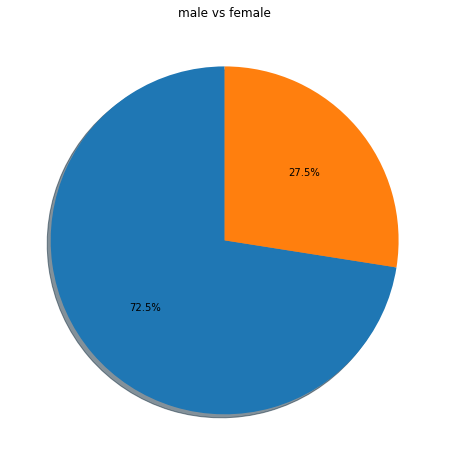

In [114]:
plt.figure(figsize=(20,8))
plt.title("male vs female")
plt.pie(gender,startangle=90,shadow=True,autopct='%.1f%%')

In [117]:
medals=ath2.Medal.value_counts()
medals

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [133]:
c=0
for i in range(len(ath2["Medal"])):
    if(ath2["Medal"][i]==''):
        c=c+1
c

0

In [147]:
female=ath2[(ath2.Sex=='F') & (ath2.Season=="Summer")][['Year']].groupby('Year').count()
female.head(5)

""
Year
1900
1904
1906
1908
1912


In [152]:
gm=len(ath2[(ath2.Medal=="Gold")])
gm

13372

TypeError: count() takes exactly one argument (0 given)